In [1]:
import numpy as np
import matplotlib.pyplot as plt

import illustris_python as il

In [2]:
#/Users/festabu/Illustris-3/output/groups_135/groups_135.0.hdf5

In [3]:
basePath = '/Users/festabu/Illustris-3/output/'

In [4]:
fields = ['SubhaloMass','SubhaloSFRinRad']

In [5]:
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [82]:
fields2 = ['SubhaloHalfmassRadType','SubhaloMassInRadType']

In [83]:
subhalos2 = il.groupcat.loadSubhalos(basePath,135,fields=fields2)

In [8]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])

In [11]:
subhalos2['SubhaloMassInRadType'].shape

(121209, 6)

### Mass vs SFR Plot

In [12]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

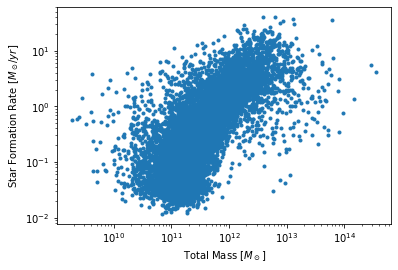

In [13]:
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

### Mass vs Size

In [14]:
subhalos2.keys()

dict_keys(['count', 'SubhaloHalfmassRadType', 'SubhaloMassInRadType'])

In [15]:
subhalos2['SubhaloHalfmassRadType']

array([[748.87006 , 665.09564 ,   0.      ,   0.      ,  60.530327,
          0.      ],
       [459.7693  , 338.59738 ,   0.      ,   0.      ,  13.493493,
          0.      ],
       [ 15.898374,  60.235096,   0.      ,   0.      ,  13.08486 ,
          0.      ],
       ...,
       [  0.      ,  22.062662,   0.      ,   0.      ,   0.      ,
          0.      ],
       [ 52.009342,  23.37706 ,   0.      ,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  17.402239,   0.      ,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [16]:
# For SubhaloHalfmassRadType, choose columns 0 and 4 bc they correspond to GAS and STARS & WIND particles, respectively
#subhalos2['SubhaloHalfmassRadType'][:,[0,4]]
subhalos2['SubhaloHalfmassRadType'][:,4] # only stellar mass contributing to the galaxy mass 

array([60.530327, 13.493493, 13.08486 , ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [17]:
subhalos2['SubhaloHalfmassRadType'][:,4].shape

(121209,)

In [18]:
# define galaxy size
galaxy_size=subhalos2['SubhaloHalfmassRadType'][:,4]

In [19]:
galaxy_size

array([60.530327, 13.493493, 13.08486 , ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [20]:
galaxy_size=galaxy_size/0.7 # divide by h=0.7

In [21]:
galaxy_size

array([86.47189 , 19.276419, 18.692657, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [24]:
# galaxy mass
subhalos2['SubhaloMassInRadType']

array([[3.7058937e+01, 1.4647640e+03, 0.0000000e+00, 0.0000000e+00,
        1.0519554e+02, 5.1651635e+00],
       [7.2492707e-01, 6.7495964e+01, 0.0000000e+00, 0.0000000e+00,
        2.2371006e+01, 5.5081254e-01],
       [4.9287382e-01, 7.7738876e+01, 0.0000000e+00, 0.0000000e+00,
        1.3509370e+01, 8.5745275e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [25]:
# define galaxy mass as only the stellar component
galaxy_mass=subhalos2['SubhaloMassInRadType'][:,4]

In [26]:
galaxy_mass

array([105.19554 ,  22.371006,  13.50937 , ...,   0.      ,   0.      ,
         0.      ], dtype=float32)

In [27]:
galaxy_mass=galaxy_mass/0.7 # divide by h=0.7

In [28]:
galaxy_mass

array([150.27934,  31.95858,  19.2991 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32)

In [29]:
galaxy_mass=galaxy_mass*1e10 # multiply galaxy mass by 1e10

In [30]:
galaxy_mass

array([1.5027934e+12, 3.1958581e+11, 1.9299100e+11, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

### Scatter plot

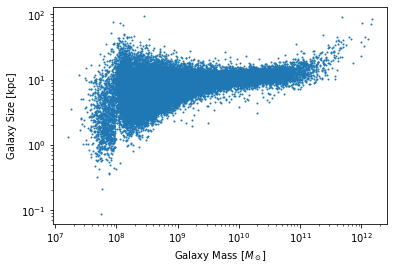

In [31]:
plt.plot(galaxy_mass,galaxy_size, '.', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Mass_vs_Size_updated_v2.jpeg", dpi=500)
plt.show()

### Logscale of size and mass entries

In [32]:
with np.errstate(divide='ignore'):
    galaxy_mass_log = np.where(galaxy_mass>0, np.log10(galaxy_mass), 0)
    galaxy_size_log = np.where(galaxy_size>0, np.log10(galaxy_size), 0)

mask_non_zero = galaxy_mass_log>0
galaxy_mass_log = galaxy_mass_log[mask_non_zero]
galaxy_size_log = galaxy_size_log[mask_non_zero]

# np.count_nonzero(galaxy_size)

In [33]:
zero_mass = galaxy_mass==0
zero_size = galaxy_size==0

In [34]:
np.sum(zero_mass == zero_size)

121209

In [35]:
mask_non_zero

array([ True,  True,  True, ..., False, False, False])

In [36]:
galaxy_mass_log

array([12.176899 , 11.504587 , 11.285537 , ...,  7.9893093,  8.128209 ,
        8.181017 ], dtype=float32)

In [37]:
galaxy_size.shape

(121209,)

In [38]:
galaxy_size_log.shape

(29165,)

In [39]:
np.count_nonzero(galaxy_size_log)

29165

Text(0, 0.5, 'Counts')

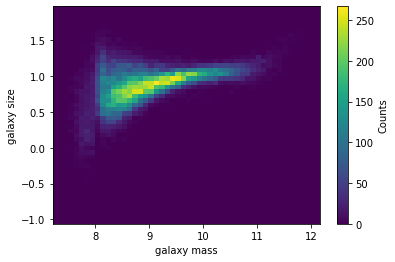

In [40]:
fig3 = plt.figure()
plt.hist2d(galaxy_mass_log,galaxy_size_log, bins=50)
plt.xlabel('galaxy mass')
plt.ylabel('galaxy size')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

### 2D Histogram 

##### 2d Histogram function vs Matplotlib hist2d

In [64]:
def hist2dplot(axis,x,y,fill=True,**kwargs):
    
    h,xed,yed=np.histogram2d(x,y)
    
    
    h=np.transpose(h)
    total=h.sum()
    h=h/total
    hflat=np.sort(np.reshape(h,-1)) #makes 1D and sorted 
    csum=np.cumsum(hflat)
    values=1.0-np.array([0.9973,0.9545,0.6827,0.0])
    
    levels=[]
    
    for val in values:
        idx = (np.abs(csum - val)).argmin()
        levels.append(hflat[idx])

    if fill:
        colors=['#f7f7f7','#cccccc','#969696','#525252'] #gray
#        colors=['#ffffcc','#c2e699','#78c679','#238443'] #green 
        axis.contourf(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    else:
        colors=['#fdcc8a','#fc8d59','#d7301f']
        axis.contour(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    
    

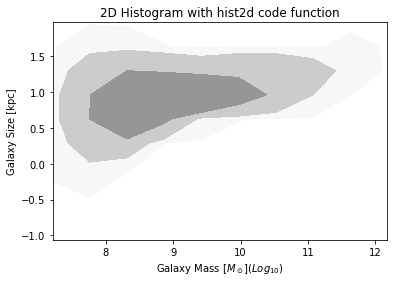

In [68]:
# Figure using the 2D Histogram function

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True, bins=1000)
plt.title('2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
plt.savefig("GalaxyStellarMass_vs_Size_hist2Dplot_v1.jpeg", dpi=500)

In [73]:
ax

<AxesSubplot:title={'center':'2D Histogram with hist2d code function'}, xlabel='Galaxy Mass [$ M_\\odot $]($ Log_{10} $)', ylabel='Galaxy Size [kpc]'>

Text(0.5, 0, 'Galaxy Mass [$ M_\\odot $]($ Log_{10} $)')

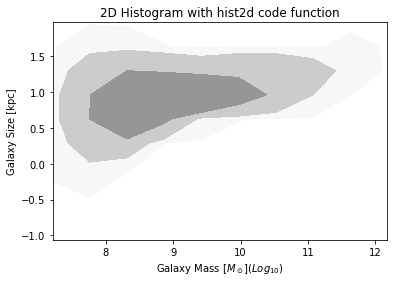

In [71]:
# Figure using the 2D Histogram function where histogram range is defined

fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True, bins=10, range=[[8,11],[0.4,1.4]])
plt.title('2D Histogram with hist2d code function')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("GalaxyStellarMass_vs_Size_hist2Dplot_v2.jpeg", dpi=500)

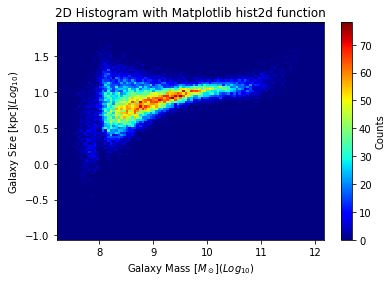

In [74]:
# Figure using the Matplotlib hist2d

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=100)
plt.title('2D Histogram with Matplotlib hist2d function')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
plt.savefig("GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v1.jpeg", dpi=500)
plt.show()

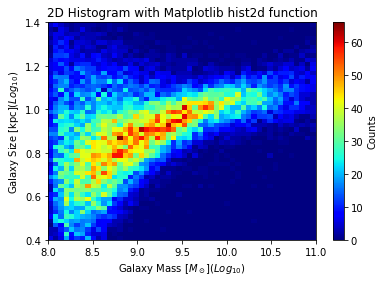

In [75]:
# Figure using the Matplotlib hist2d where histogram range is defined

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=50,  range=[[8,11],[0.4,1.4]]  )
plt.title('2D Histogram with Matplotlib hist2d function')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
plt.savefig("GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v2.jpeg", dpi=500)
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
plt.savefig("GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v2.jpeg", dpi=500)
plt.show()

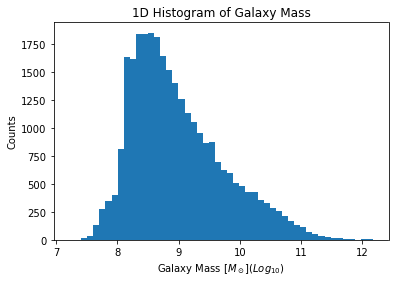

In [76]:
plt.hist(galaxy_mass_log,bins=50)
plt.title('1D Histogram of Galaxy Mass')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
plt.savefig("GalaxyStellarMass_Hist1D.jpeg", dpi=500)
plt.show()

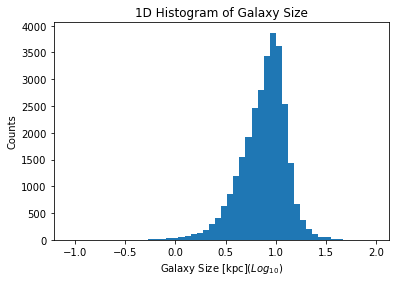

In [77]:
plt.hist(galaxy_size_log,bins=50)
plt.title('1D Histogram of Galaxy Size')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.savefig("GalaxySize_Hist1D.jpeg", dpi=500)
plt.show()

### Scatter plot logarithmic scale

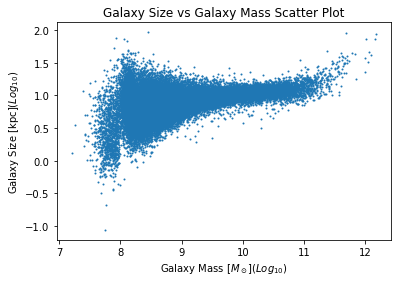

In [78]:
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
plt.title('Galaxy Size vs Galaxy Mass Scatter Plot')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.legend(loc='lower right')
plt.savefig("GalaxyStellarMass_vs_Size_scatter_v1.jpeg", dpi=500)
plt.show()

### Histogram 2D and Scatter Plot overlap

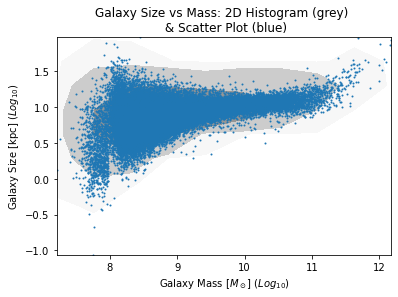

In [79]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
#cbar2 = plt.colorbar()
#cbar2.ax.set_ylabel('Counts')
plt.title('Galaxy Size vs Mass: 2D Histogram (grey) \n & Scatter Plot (blue)')
#plt.ylabel('Galaxy Size [kpc]')
#plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Mass_vs_Size_hist2Dplot_log.jpeg", dpi=500)
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2)
#plt.title('Galaxy Size vs Galaxy Mass Scatter Plot')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc] ($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $] ($ Log_{10} $)')
#plt.legend(loc='lower right')
plt.savefig("GalaxyStellarMass_vs_Size_hist2d_and_scatterplot.jpeg", dpi=500)
plt.show()

### Central galaxies vs satellites

In [84]:
il.SubhaloFlag

AttributeError: module 'illustris_python' has no attribute 'SubhaloFlag'

In [90]:
subhalos3 = il.groupcat.loadSubhalos(basePath,135,fields=fields3)

Exception: Group catalog does not have requested field [SubhaloFlag]!

In [89]:
fields3=['SubhaloFlag']